# 초기 설정

In [ ]:
import random
import os
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#load all the libraries...
import pandas as pd
import numpy as np
import re
from IPython.display import display, HTML, Image

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")
import math
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
CFG = {
    'TRAIN_WINDOW_SIZE':90, # 90일치로 학습
    'PREDICT_SIZE':21, # 21일치 예측
    'EPOCHS':10,
    'LEARNING_RATE':1e-4,
    'BATCH_SIZE':512,
    'SEED':41
}
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) # Seed 고정

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
#load all the libraries...
import pandas as pd
import numpy as np
import re
from IPython.display import display, HTML, Image

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import math

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
CFG = {
    'TRAIN_WINDOW_SIZE':90, # 90일치로 학습
    'PREDICT_SIZE':21, # 21일치 예측
    'EPOCHS':10,
    'LEARNING_RATE':1e-4,
    'BATCH_SIZE':512,
    'SEED':41
}

In [ ]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) # Seed 고정

In [ ]:
brand=pd.read_csv("/content/drive/MyDrive/LG aimers/brand_keyword_cnt.csv")
train_data=pd.read_csv("/content/drive/MyDrive/LG aimers/train.csv").drop(columns=['ID', '제품','대분류','중분류','소분류'])

# 결측치 제거

In [ ]:
NoneRow = (brand[brand.isnull().any(axis=1)]).loc[:, '브랜드']
NoneRow = list(NoneRow)

In [ ]:
NoneBrandIndex = []
for brandCode in NoneRow:
    NoneBrandIndex += list(train_data[train_data['브랜드'] == brandCode].index)
brand = brand.dropna()

In [ ]:
len(NoneBrandIndex)

208

In [ ]:
brand = brand.dropna() # 결측치 제거 (35행 지워짐)
train_data = train_data.drop(NoneBrandIndex)

In [ ]:
train_data = train_data.rename(index = {j: i for i, j in enumerate(train_data.index)})

# 평균값이 제을 높은 brand count 1등~5등

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
categorical_columns = [ '브랜드']

for col in categorical_columns:
    label_encoder.fit(brand[col])
    brand[col] = label_encoder.transform(brand[col])

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
categorical_columns = [ '브랜드']

for col in categorical_columns:
    label_encoder.fit(train_data[col])
    train_data[col] = label_encoder.transform(train_data[col])

In [ ]:
'''
# 숫자형 변수들의 min-max scaling을 수행하는 코드입니다.
numeric_cols = train_data.columns[4:]
# 칵 column의 min 및 max 계산
min_values = train_data[numeric_cols].min(axis=1)
max_values = train_data[numeric_cols].max(axis=1)
# 각 행의 범위(max-min)를 계산하고, 범위가 0인 경우 1로 대체
ranges = max_values - min_values
ranges[ranges == 0] = 1
# min-max scaling 수행
train_data[numeric_cols] = (train_data[numeric_cols].subtract(min_values, axis=0)).div(ranges, axis=0)
# max와 min 값을 dictionary 형태로 저장
scale_min_dict = min_values.to_dict()
scale_max_dict = max_values.to_dict()
'''

'\n# 숫자형 변수들의 min-max scaling을 수행하는 코드입니다.\nnumeric_cols = train_data.columns[4:]\n# 칵 column의 min 및 max 계산\nmin_values = train_data[numeric_cols].min(axis=1)\nmax_values = train_data[numeric_cols].max(axis=1)\n# 각 행의 범위(max-min)를 계산하고, 범위가 0인 경우 1로 대체\nranges = max_values - min_values\nranges[ranges == 0] = 1\n# min-max scaling 수행\ntrain_data[numeric_cols] = (train_data[numeric_cols].subtract(min_values, axis=0)).div(ranges, axis=0)\n# max와 min 값을 dictionary 형태로 저장\nscale_min_dict = min_values.to_dict()\nscale_max_dict = max_values.to_dict()\n'

In [ ]:
'''
# 숫자형 변수들의 min-max scaling을 수행하는 코드입니다.
numeric_cols = brand.columns[4:]
# 칵 column의 min 및 max 계산
min_values = brand[numeric_cols].min(axis=1)
max_values = brand[numeric_cols].max(axis=1)
# 각 행의 범위(max-min)를 계산하고, 범위가 0인 경우 1로 대체
ranges = max_values - min_values
ranges[ranges == 0] = 1
# min-max scaling 수행
brand[numeric_cols] = (brand[numeric_cols].subtract(min_values, axis=0)).div(ranges, axis=0)
# max와 min 값을 dictionary 형태로 저장
scale_min_dict = min_values.to_dict()
scale_max_dict = max_values.to_dict()
brand[brand['브랜드'] == 776]
'''

"\n# 숫자형 변수들의 min-max scaling을 수행하는 코드입니다.\nnumeric_cols = brand.columns[4:]\n# 칵 column의 min 및 max 계산\nmin_values = brand[numeric_cols].min(axis=1)\nmax_values = brand[numeric_cols].max(axis=1)\n# 각 행의 범위(max-min)를 계산하고, 범위가 0인 경우 1로 대체\nranges = max_values - min_values\nranges[ranges == 0] = 1\n# min-max scaling 수행\nbrand[numeric_cols] = (brand[numeric_cols].subtract(min_values, axis=0)).div(ranges, axis=0)\n# max와 min 값을 dictionary 형태로 저장\nscale_min_dict = min_values.to_dict()\nscale_max_dict = max_values.to_dict()\nbrand[brand['브랜드'] == 776]\n"

In [ ]:
# 각 열의 합과 평균을 계산
column_means = np.mean(brand, axis=1)[1:]
column_numbers = list(range(1, len(column_means) + 1))

data = {'행 번호': column_numbers, '행 평균': column_means}
df = pd.DataFrame(data)

# 평균을 기준으로 높은 순위를 부여
df['순위'] = df['행 평균'].rank(ascending=False)

filtered_df = df[df['순위'].between(1, 10)]

filtered_df

,행 번호,행 평균,순위
379,375,204.695675,7.0
476,468,548.919340,2.0
787,776,596.466826,1.0
921,909,420.621228,4.0
2119,2096,159.729874,10.0
2204,2180,163.130340,9.0
2644,2613,409.124153,5.0
2782,2750,309.504296,6.0
2828,2796,464.123486,3.0
2933,2900,167.796979,8.0


In [ ]:
selected_rows = train_data[train_data['브랜드'].isin([ 468, 776, 909, 2613,  2796,375, 2096, 2180, 2750, 2900])]

In [ ]:
grouped = selected_rows.groupby('브랜드').sum().reset_index()
grouped

,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,375,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,468,6,7,4,5,4,7,9,4,5,...,0,0,0,30,16,96,37,26,41,24
2,776,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
3,909,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2096,25,19,17,17,28,32,42,24,20,...,0,0,0,22,46,18,15,52,32,46
5,2180,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2613,0,0,0,0,0,0,0,0,0,...,0,0,0,850,920,690,240,380,820,670
7,2750,18,16,16,7,6,6,2,3,4,...,49,42,49,70,51,46,35,42,58,36
8,2796,1,1,0,4,4,5,1,1,4,...,0,0,0,8,4,1,4,10,6,0
9,2900,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 1~5등 시각화

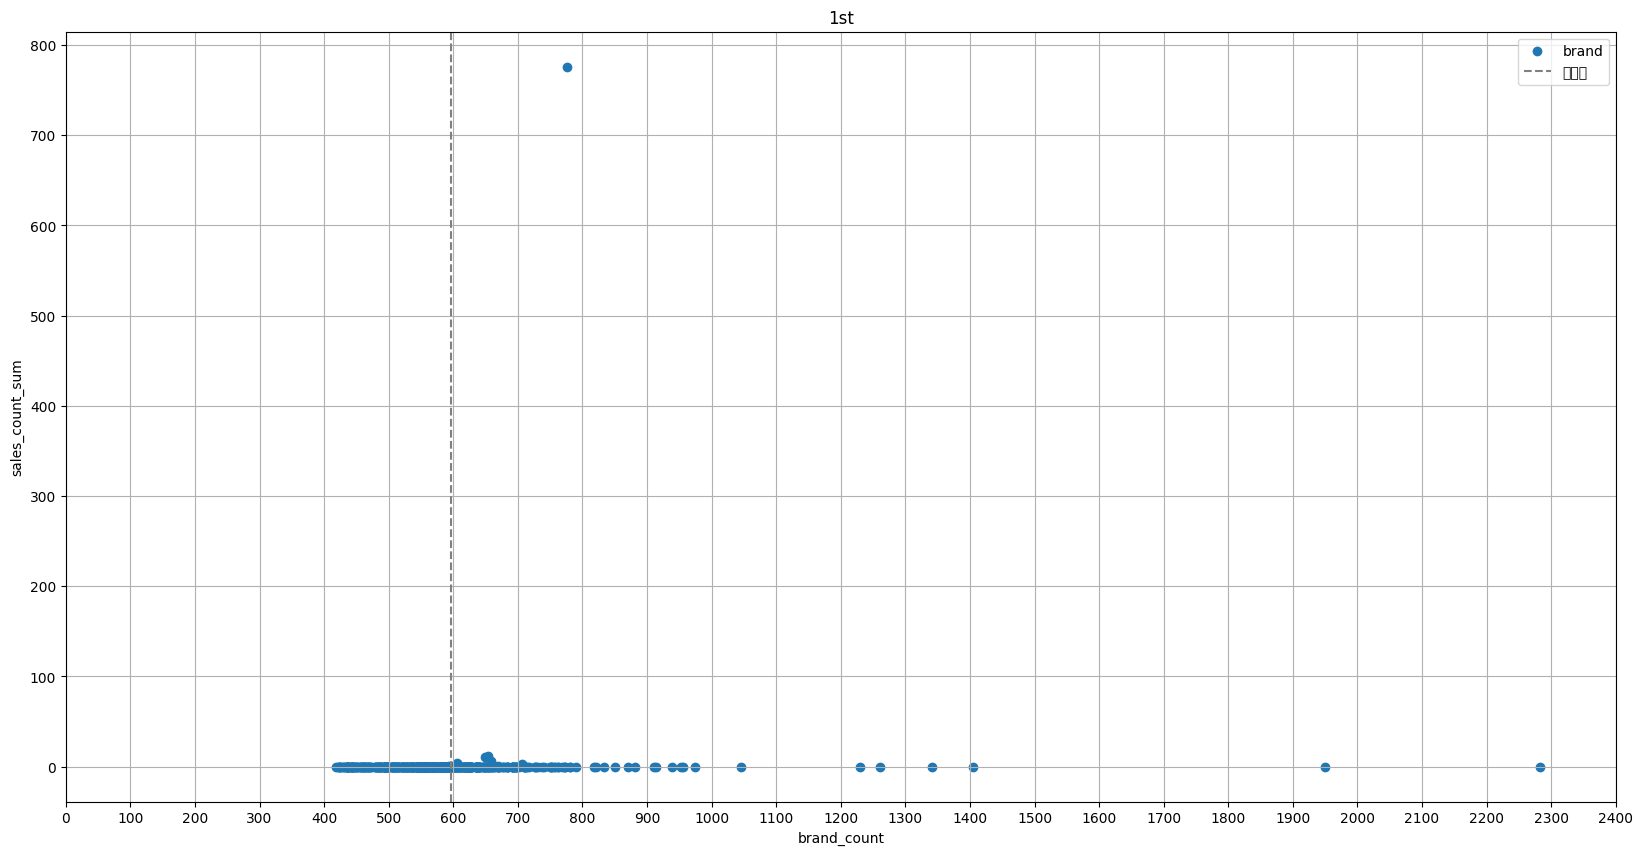

In [ ]:
# 1등
plt.figure(figsize=(20, 10))
x= brand[brand['브랜드'] == 776].values[0]
y= grouped[grouped['브랜드'] == 776].values[0]
baseline = filtered_df.iloc[1]['행 평균']
plt.scatter(x,y, label = 'brand')
plt.axvline(x=baseline, color='gray', linestyle='--', label='기준선')
x_ticks = np.arange(0, 2500, 100)
plt.xticks(x_ticks)
plt.xlabel('brand_count')
plt.ylabel('sales_count_sum')
plt.title('1st')
plt.legend()
plt.grid(True)
plt.show()

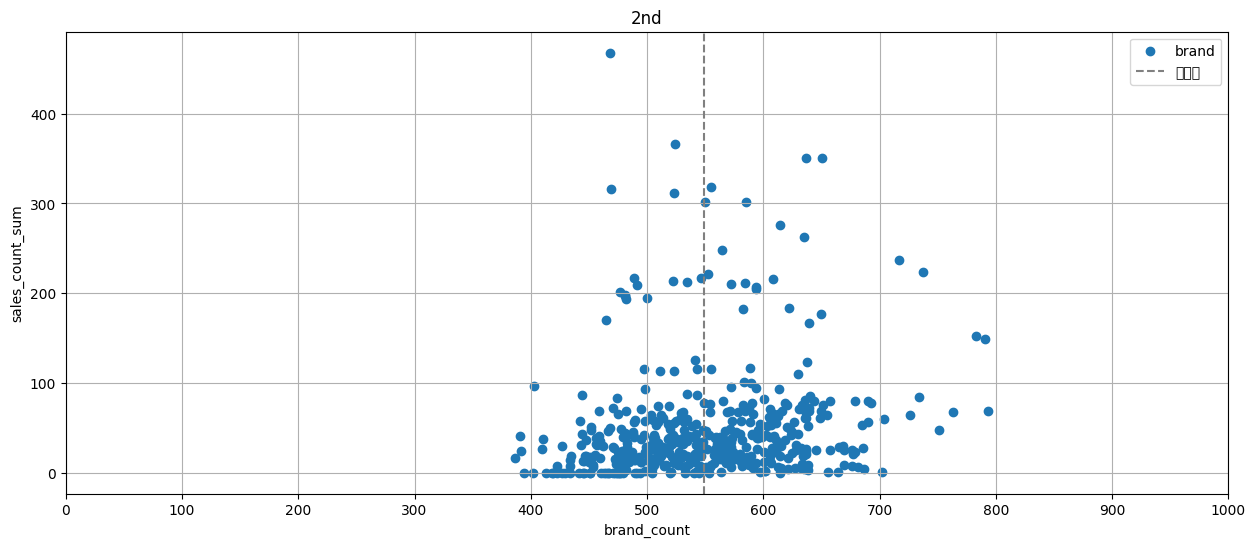

In [ ]:
# 2등
plt.figure(figsize=(15, 6))
x= brand[brand['브랜드'] == 468].values[0]
y= grouped[grouped['브랜드'] == 468].values[0]
baseline = filtered_df.iloc[0]['행 평균']
plt.scatter(x,y, label = 'brand')
plt.axvline(x=baseline, color='gray', linestyle='--', label='기준선')
plt.xticks(range(0, 1100, 100))
plt.ylabel('sales_count_sum')
plt.xlabel('brand_count')
plt.title('2nd')
plt.legend()
plt.grid(True)
plt.show()

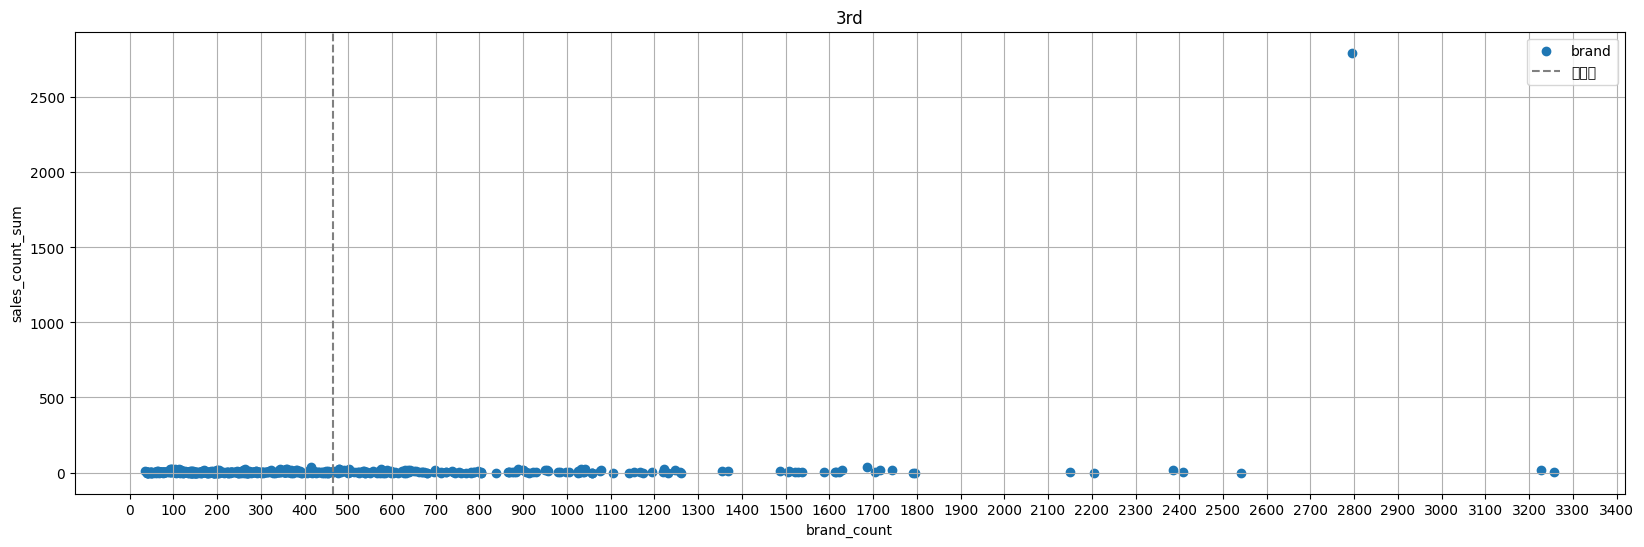

In [ ]:
# 3등
plt.figure(figsize=(20, 6))
x= brand[brand['브랜드'] == 2796].values[0]
y= grouped[grouped['브랜드'] == 2796].values[0]
baseline = filtered_df.iloc[4]['행 평균']
plt.scatter(x,y, label = 'brand')
plt.axvline(x=baseline, color='gray', linestyle='--', label='기준선')
plt.xticks(range(0, 3500, 100))
plt.ylabel('sales_count_sum')
plt.xlabel('brand_count')
plt.title('3rd')
plt.legend()
plt.grid(True)
plt.show()

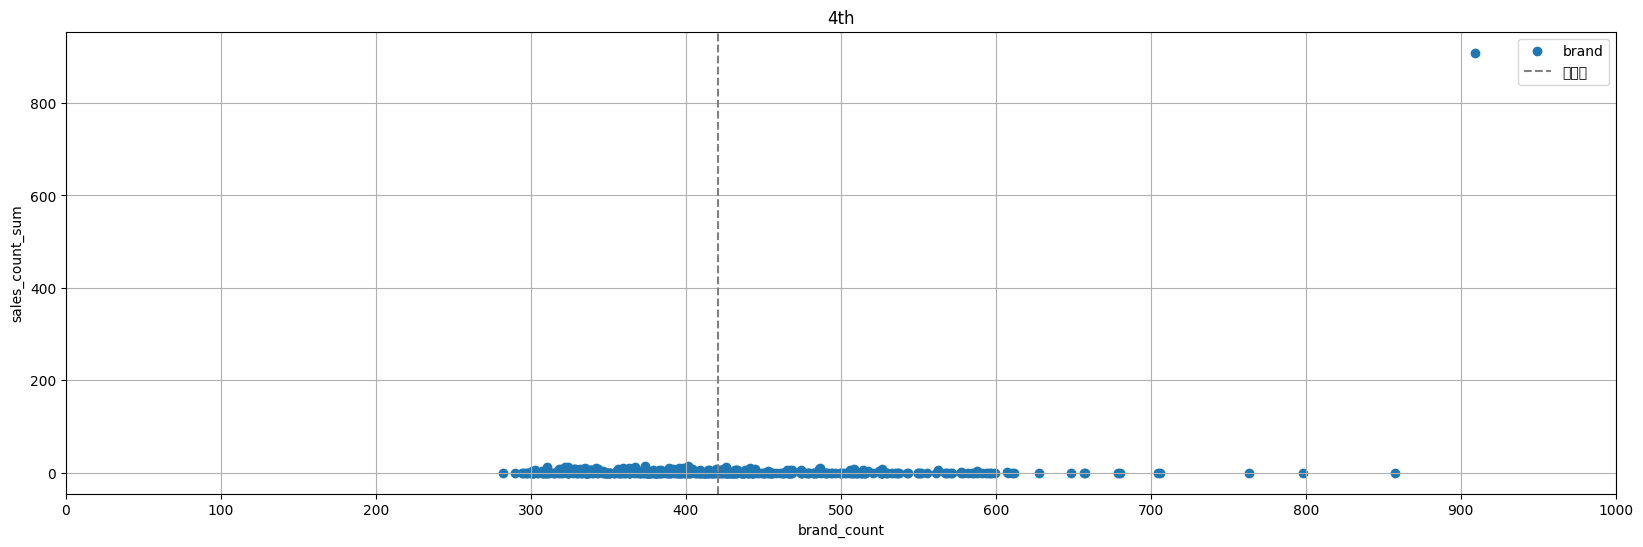

In [ ]:
# 4등
plt.figure(figsize=(20, 6))
x= brand[brand['브랜드'] == 909].values[0]
y= grouped[grouped['브랜드'] == 909].values[0]
baseline = filtered_df.iloc[2]['행 평균']
plt.scatter(x,y, label = 'brand')
plt.axvline(x=baseline, color='gray', linestyle='--', label='기준선')
plt.xticks(range(0, 1100, 100))
plt.ylabel('sales_count_sum')
plt.xlabel('brand_count')
plt.title('4th')
plt.legend()
plt.grid(True)
plt.show()

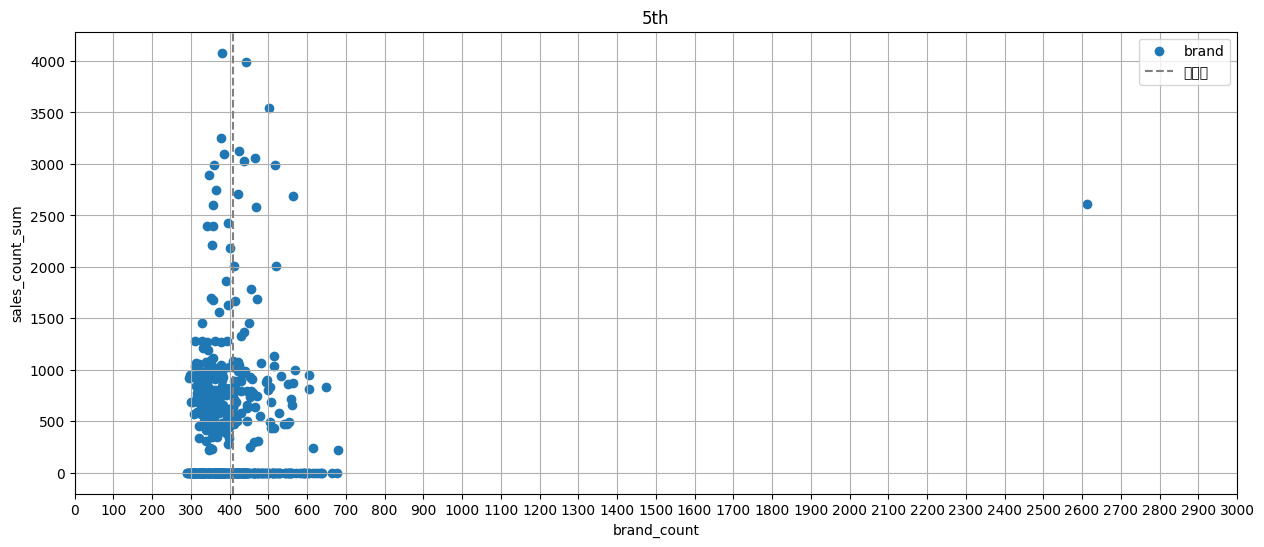

In [ ]:
# 5등
plt.figure(figsize=(15, 6))
x= brand[brand['브랜드'] == 2613].values[0]
y= grouped[grouped['브랜드'] == 2613].values[0]
baseline = filtered_df.iloc[3]['행 평균']
plt.scatter(x,y, label = 'brand')
plt.axvline(x=baseline, color='gray', linestyle='--', label='기준선')
plt.xticks(range(0, 3100, 100))
plt.ylabel('sales_count_sum')
plt.xlabel('brand_count')
plt.title('5th')
plt.legend()
plt.grid(True)
plt.show()

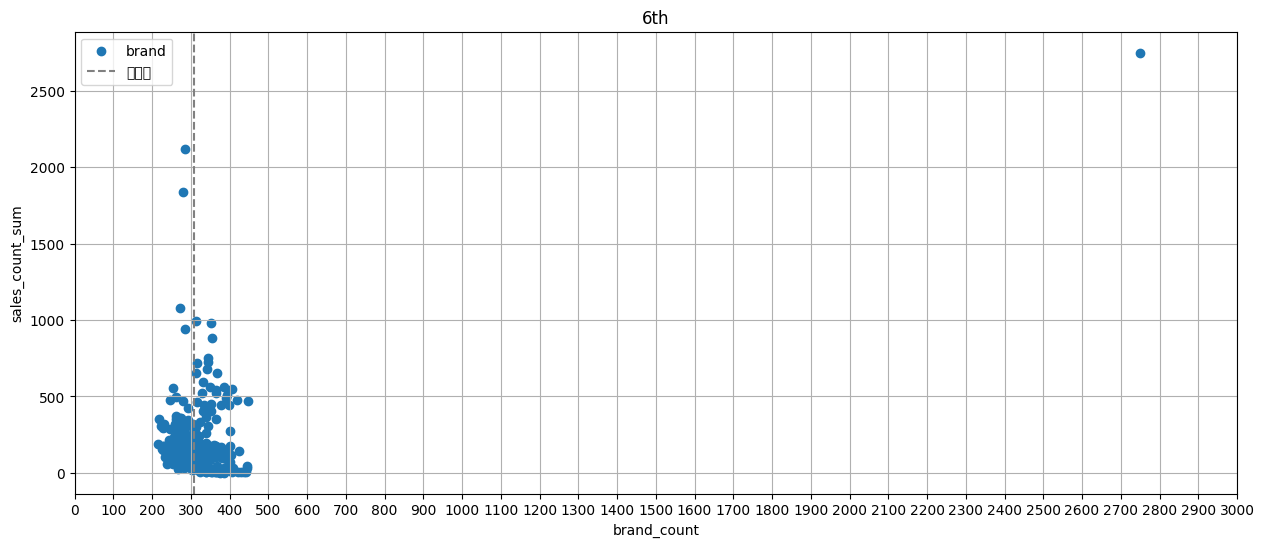

In [ ]:
# 6등
plt.figure(figsize=(15, 6))
x= brand[brand['브랜드'] == 2750].values[0]
y= grouped[grouped['브랜드'] == 2750].values[0]
baseline = filtered_df.iloc[7]['행 평균']
plt.scatter(x,y, label = 'brand')
plt.axvline(x=baseline, color='gray', linestyle='--', label='기준선')
plt.xticks(range(0, 3100, 100))
plt.ylabel('sales_count_sum')
plt.xlabel('brand_count')
plt.title('6th')
plt.legend()
plt.grid(True)
plt.show()

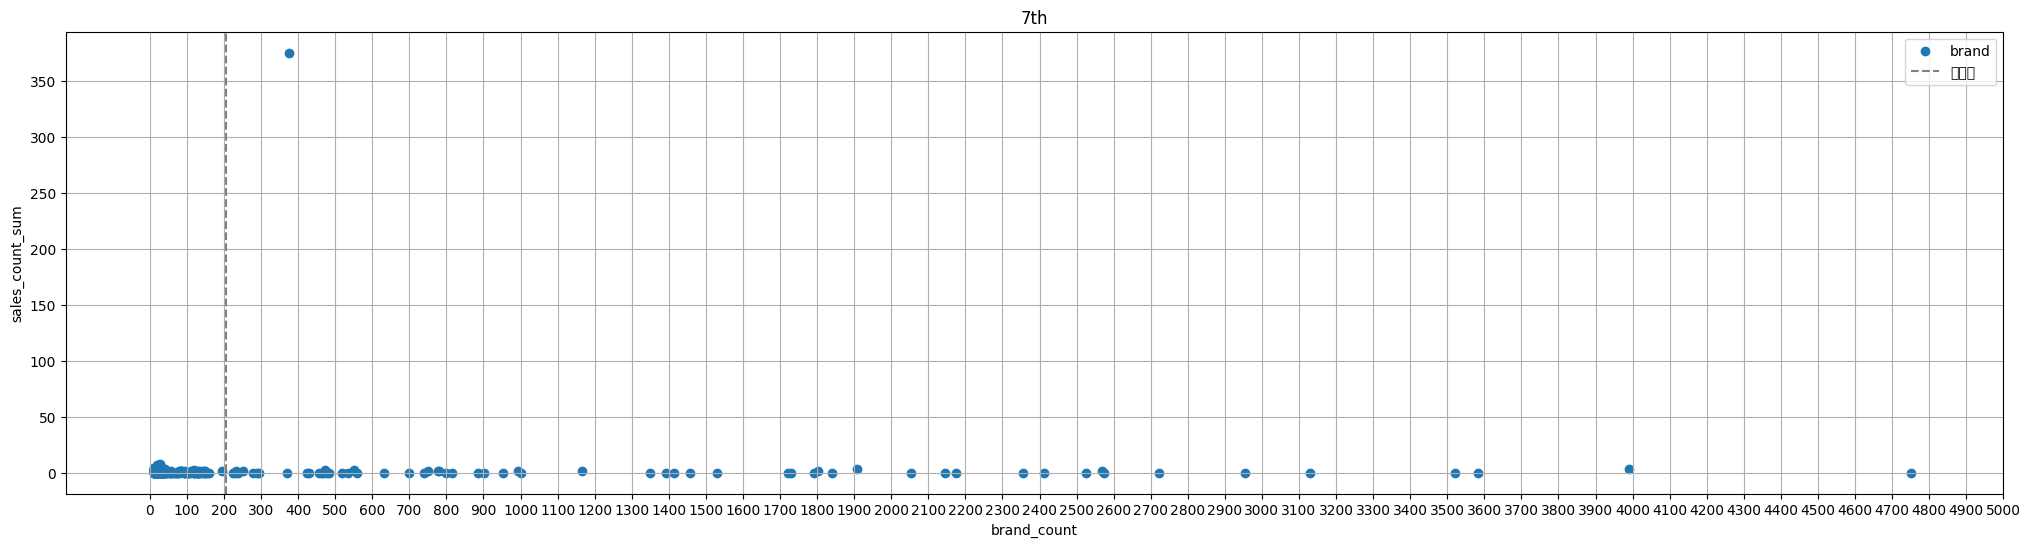

In [ ]:
# 7등
plt.figure(figsize=(25, 6))
x= brand[brand['브랜드'] == 375].values[0]
y= grouped[grouped['브랜드'] == 375].values[0]
baseline = filtered_df.iloc[0]['행 평균']
plt.scatter(x,y, label = 'brand')
plt.axvline(x=baseline, color='gray', linestyle='--', label='기준선')
plt.xticks(range(0, 5100, 100))
plt.ylabel('sales_count_sum')
plt.xlabel('brand_count')
plt.title('7th')
plt.legend()
plt.grid(True)
plt.show()

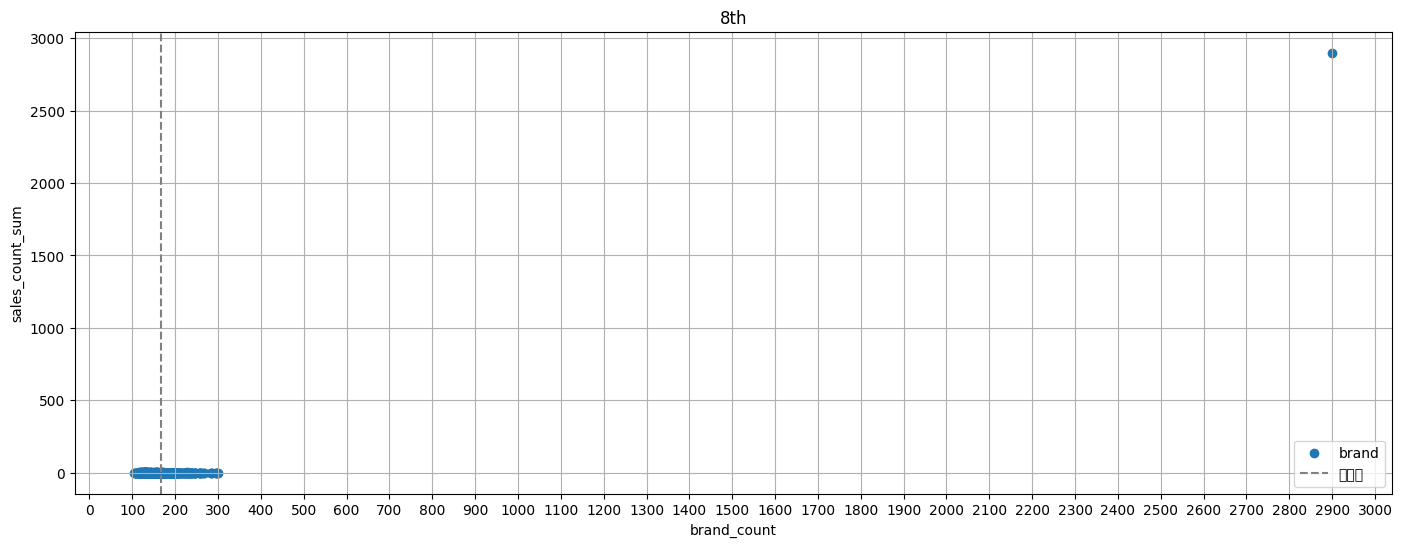

In [ ]:
# 8등
plt.figure(figsize=(17, 6))
x= brand[brand['브랜드'] == 2900].values[0]
y= grouped[grouped['브랜드'] == 2900].values[0]
baseline = filtered_df.iloc[9]['행 평균']
plt.scatter(x,y, label = 'brand')
plt.axvline(x=baseline, color='gray', linestyle='--', label='기준선')
plt.xticks(range(0, 3100, 100))
plt.ylabel('sales_count_sum')
plt.xlabel('brand_count')
plt.title('8th')
plt.legend()
plt.grid(True)
plt.show()

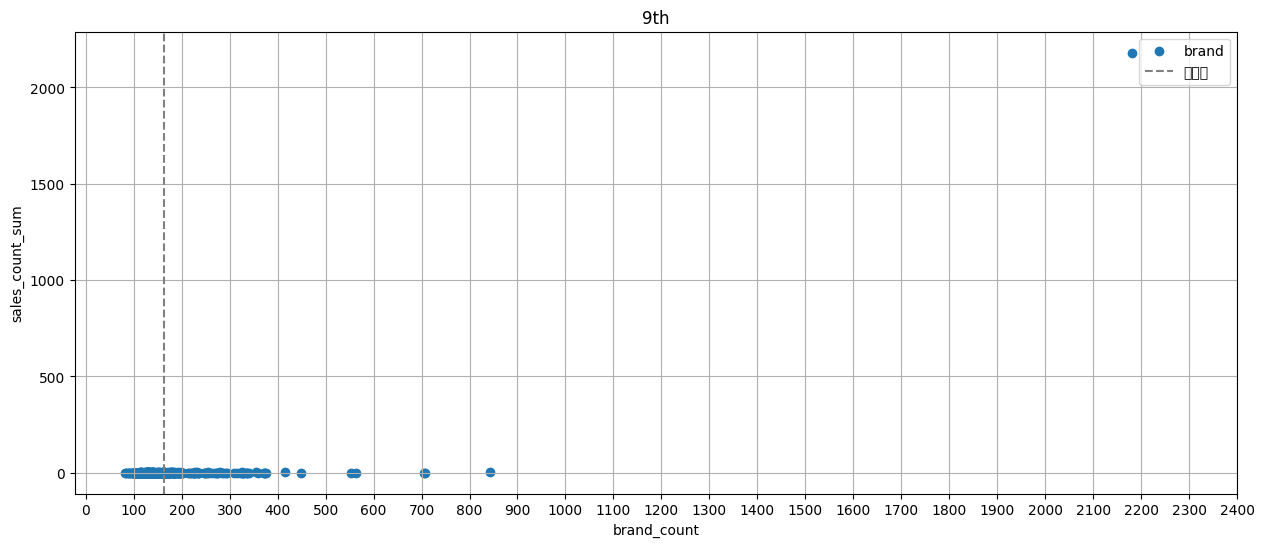

In [ ]:
# 9등
plt.figure(figsize=(15, 6))
x= brand[brand['브랜드'] == 2180].values[0]
y= grouped[grouped['브랜드'] == 2180].values[0]
baseline = filtered_df.iloc[5]['행 평균']
plt.scatter(x,y, label = 'brand')
plt.axvline(x=baseline, color='gray', linestyle='--', label='기준선')
plt.xticks(range(0, 2500, 100))
plt.ylabel('sales_count_sum')
plt.xlabel('brand_count')
plt.title('9th')
plt.legend()
plt.grid(True)
plt.show()

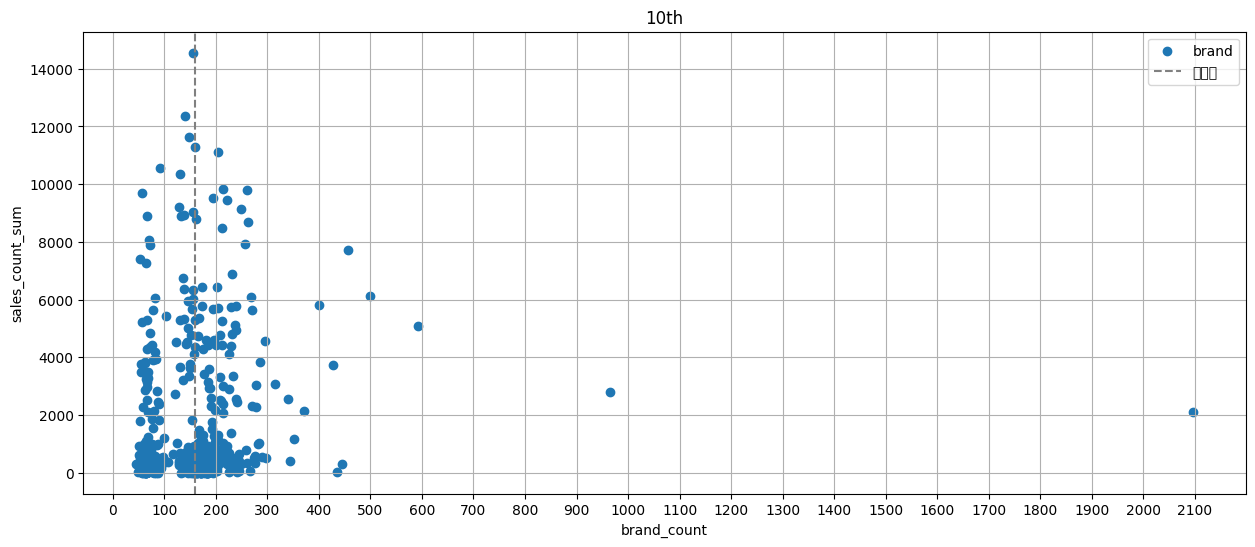

In [ ]:
# 10등
plt.figure(figsize=(15, 6))
x= brand[brand['브랜드'] == 2096].values[0]
y= grouped[grouped['브랜드'] == 2096].values[0]
baseline = filtered_df.iloc[4]['행 평균']
plt.scatter(x,y, label = 'brand')
plt.axvline(x=baseline, color='gray', linestyle='--', label='기준선')
plt.xticks(range(0, 2200, 100))
plt.ylabel('sales_count_sum')
plt.xlabel('brand_count')
plt.title('10th')
plt.legend()
plt.grid(True)
plt.show()

# 일별 판매량


In [ ]:
def same_col_data(id, data, col='브랜드'):
    same_col_data = data[data[col] == id]
    len_row = len(same_col_data)
    X = same_col_data.iloc[0, :][1:].index
    y = [same_col_data.iloc[i, :][1:] for i in range(len_row)]
    return X, y

In [ ]:
id = 1
X, y = same_col_data(id, train_data)

In [ ]:
def one_row_data(id, salecount_data, brand_data):
    one_row_data = salecount_data.iloc[id, 1:]
    brand_id = salecount_data.loc[id, '브랜드']

    X = one_row_data.index
    y_salecount = one_row_data

    y_brand = brand_data[brand_data['브랜드'] == brand_id].iloc[0, 1:]
    return X, y_salecount, y_brand

In [ ]:
id = 1
X, y_salecount, y_brand = one_row_data(id, train_data, brand)

In [ ]:
# 표준화
mean_brand = np.mean(y_brand)
std_brand = np.std(y_brand)
y_brand_ = (y_brand - mean_brand) / std_brand

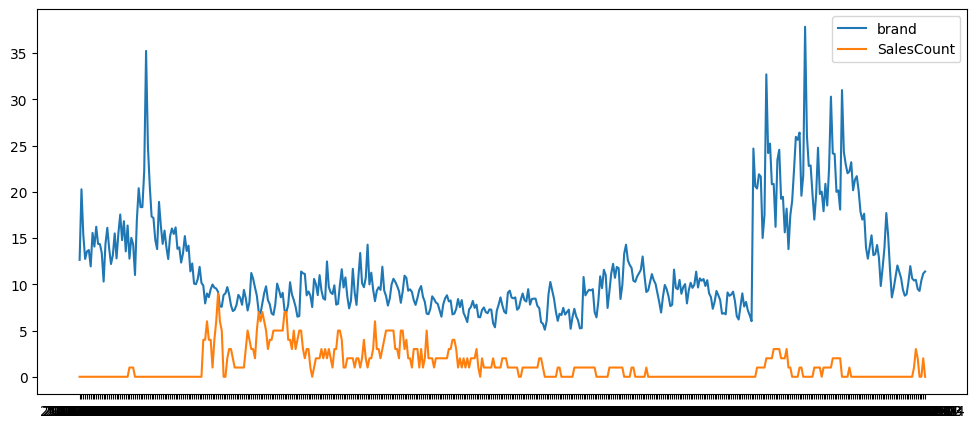

In [ ]:
plt.figure(figsize=(12,5))
# plt.yscale('linear') # 'linear', 'log', 'symlog', 'asinh', 'logit', 'function', 'functionlog'
# plt.plot(X, y_price_, label = 'Prices')
plt.plot(X, y_brand, label = 'brand')
plt.plot(X, y_salecount, label = 'SalesCount')

plt.legend()